In [75]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pylab
from scipy.signal import lfilter
from scipy.signal import periodogram
from scipy.signal import TransferFunction
from scipy.signal import ZerosPolesGain
from scipy.signal import sawtooth
from scipy.signal import freqz
from scipy.fftpack import *
from control.matlab import *

# 4.2.1
–†–∞–∑—Ä–∞–±–æ—Ç–∞–π—Ç–µ –≤ Matlab —Ñ—É–Ω–∫—Ü–∏—é \[P, P_dB] = calc_power(x) –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –º–æ—â–Ω–æ—Å—Ç–∏ —Å–∏–≥–Ω–∞–ª–∞ –ø–æ —Ñ–æ—Ä–º—É–ª–µ 

$$P_a = \frac{1}{N}\displaystyle\sum_{n = 0}^{N - 1} x^2(n).$$

–§—É–Ω–∫—Ü–∏—è —Ç–∞–∫–∂–µ –¥–æ–ª–∂–Ω–∞ –≤—ã–¥–∞–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –º–æ—â–Ω–æ—Å—Ç–∏ –≤ –¥–µ—Ü–∏–±–µ–ª–∞—Ö

$$P_{dB} = 10 \log_{10}P_a.$$
 
–ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –º–æ—â–Ω–æ—Å—Ç—å —Å–ª–µ–¥—É—é—â–∏—Ö —Å–∏–≥–Ω–∞–ª–æ–≤ –ø—Ä–∏ n = 0, 1, ..., 127:

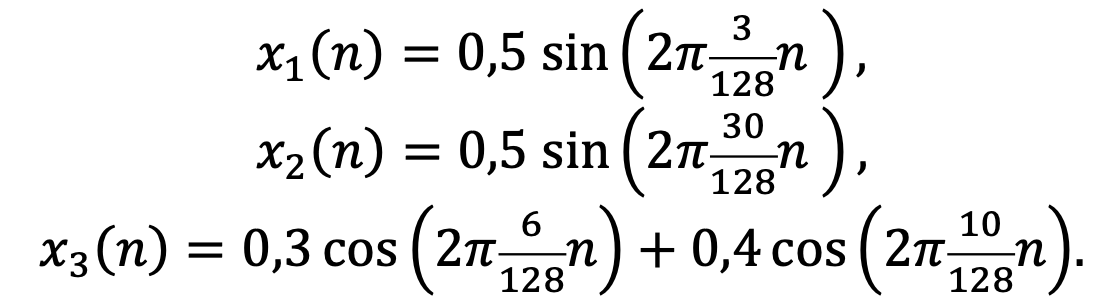

In [17]:
def calc_power(x):
    P = (sum(i * i for i in x) / len(x))
    P_dB = 10 * np.log10(P)
    return [P, P_dB]

In [19]:
n = np.arange(0, 128, 1)
x1 = 0.5 * np.sin(2 * np.pi * 3 / 128 * n)
x2 = 0.5 * np.sin(2 * np.pi * 30 / 128 * n)
x3 = 0.3 * np.cos(2 * np.pi * 6 / 128 * n) + 0.4 * np.cos(2 * np.pi * 10 / 128 * n)

In [20]:
P1 = calc_power(x1)
P2 = calc_power(x2)
P3 = calc_power(x3)

In [23]:
print(f'–ú–æ—â–Ω–æ—Å—Ç—å –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ {P1}')
print(f'–ú–æ—â–Ω–æ—Å—Ç—å –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ {P2}')
print(f'–ú–æ—â–Ω–æ—Å—Ç—å –¥–ª—è —Ç—Ä–µ—Ç—å–µ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ {P3}')

–ú–æ—â–Ω–æ—Å—Ç—å –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ [0.125, -9.030899869919436]
–ú–æ—â–Ω–æ—Å—Ç—å –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ [0.1249999999999999, -9.03089986991944]
–ú–æ—â–Ω–æ—Å—Ç—å –¥–ª—è —Ç—Ä–µ—Ç—å–µ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ [0.12499999999999996, -9.030899869919438]


# 4.2.2
–†–∞–∑—Ä–∞–±–æ—Ç–∞–π—Ç–µ –≤ Matlab —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –ø–µ—Ä–∏–æ–¥–æ–≥—Ä–∞–º–º—ã —Å–∏–≥–Ω–∞–ª–∞ 

$$P_{xx}(k) = \frac{1}{N} |X(k)|^2, k = 0, 1, ..., N - 1.$$ 

–ü–æ—Å—Ç—Ä–æ–π—Ç–µ –ø–µ—Ä–∏–æ–¥–æ–≥—Ä–∞–º–º—ã —Å–∏–≥–Ω–∞–ª–æ–≤ –∏–∑ –∑–∞–¥–∞–Ω–∏—è 4.2.1. –í—ã—á–∏—Å–ª–∏—Ç–µ –º–æ—â–Ω–æ—Å—Ç—å —Å–∏–≥–Ω–∞–ª–æ–≤ –∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –ø–µ—Ä–∏–æ–¥–æ–≥—Ä–∞–º–º –ø–æ —Ñ–æ—Ä–º—É–ª–µ

$$P_a = \frac{1}{N^2}\displaystyle\sum_{k = 0}^{N - 1} |X(k)|^2.$$.

In [29]:
def calc_pxx(x):
    Pxx = [(np.fabs(i) ** 2) / len(x) for i in x]
    Pa = calc_power(Pxx)
    return [Pxx, Pa]

In [30]:
Pxx1 = calc_pxx(x1)
Pxx2 = calc_pxx(x2)
Pxx3 = calc_pxx(x3)

In [37]:
print(f'–ú–æ—â–Ω–æ—Å—Ç—å –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ {Pxx1[1]}')
print(f'–ú–æ—â–Ω–æ—Å—Ç—å –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ {Pxx2[1]}')
print(f'–ú–æ—â–Ω–æ—Å—Ç—å –¥–ª—è —Ç—Ä–µ—Ç—å–µ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ {Pxx3[1]}')

–ú–æ—â–Ω–æ—Å—Ç—å –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ [1.4305114746093748e-06, -58.44508654223943]
–ú–æ—â–Ω–æ—Å—Ç—å –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ [1.4305114746093752e-06, -58.44508654223943]
–ú–æ—â–Ω–æ—Å—Ç—å –¥–ª—è —Ç—Ä–µ—Ç—å–µ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ [2.089691162109375e-06, -56.799178940337185]


In [56]:
def plorPxx(i):
    global Pxx1, Pxx2, Pxx3
    Pxx = [Pxx1, Pxx2, Pxx3]
    pylab.subplot(3, 1, (i + 1))
    pylab.plot(n, Pxx[i][0], linestyle='-', color='b', linewidth=0.5)
    pylab.grid()
    pylab.xlabel('–ù–æ–º–µ—Ä –æ—Ç—Å—á–µ—Ç–∞')
    pylab.ylabel('–ê–º–ø–ª–∏—Ç—É–¥–∞')
    pylab.title(f'–°–∏–≥–Ω–∞–ª ‚Ññ {(i + 1)}')

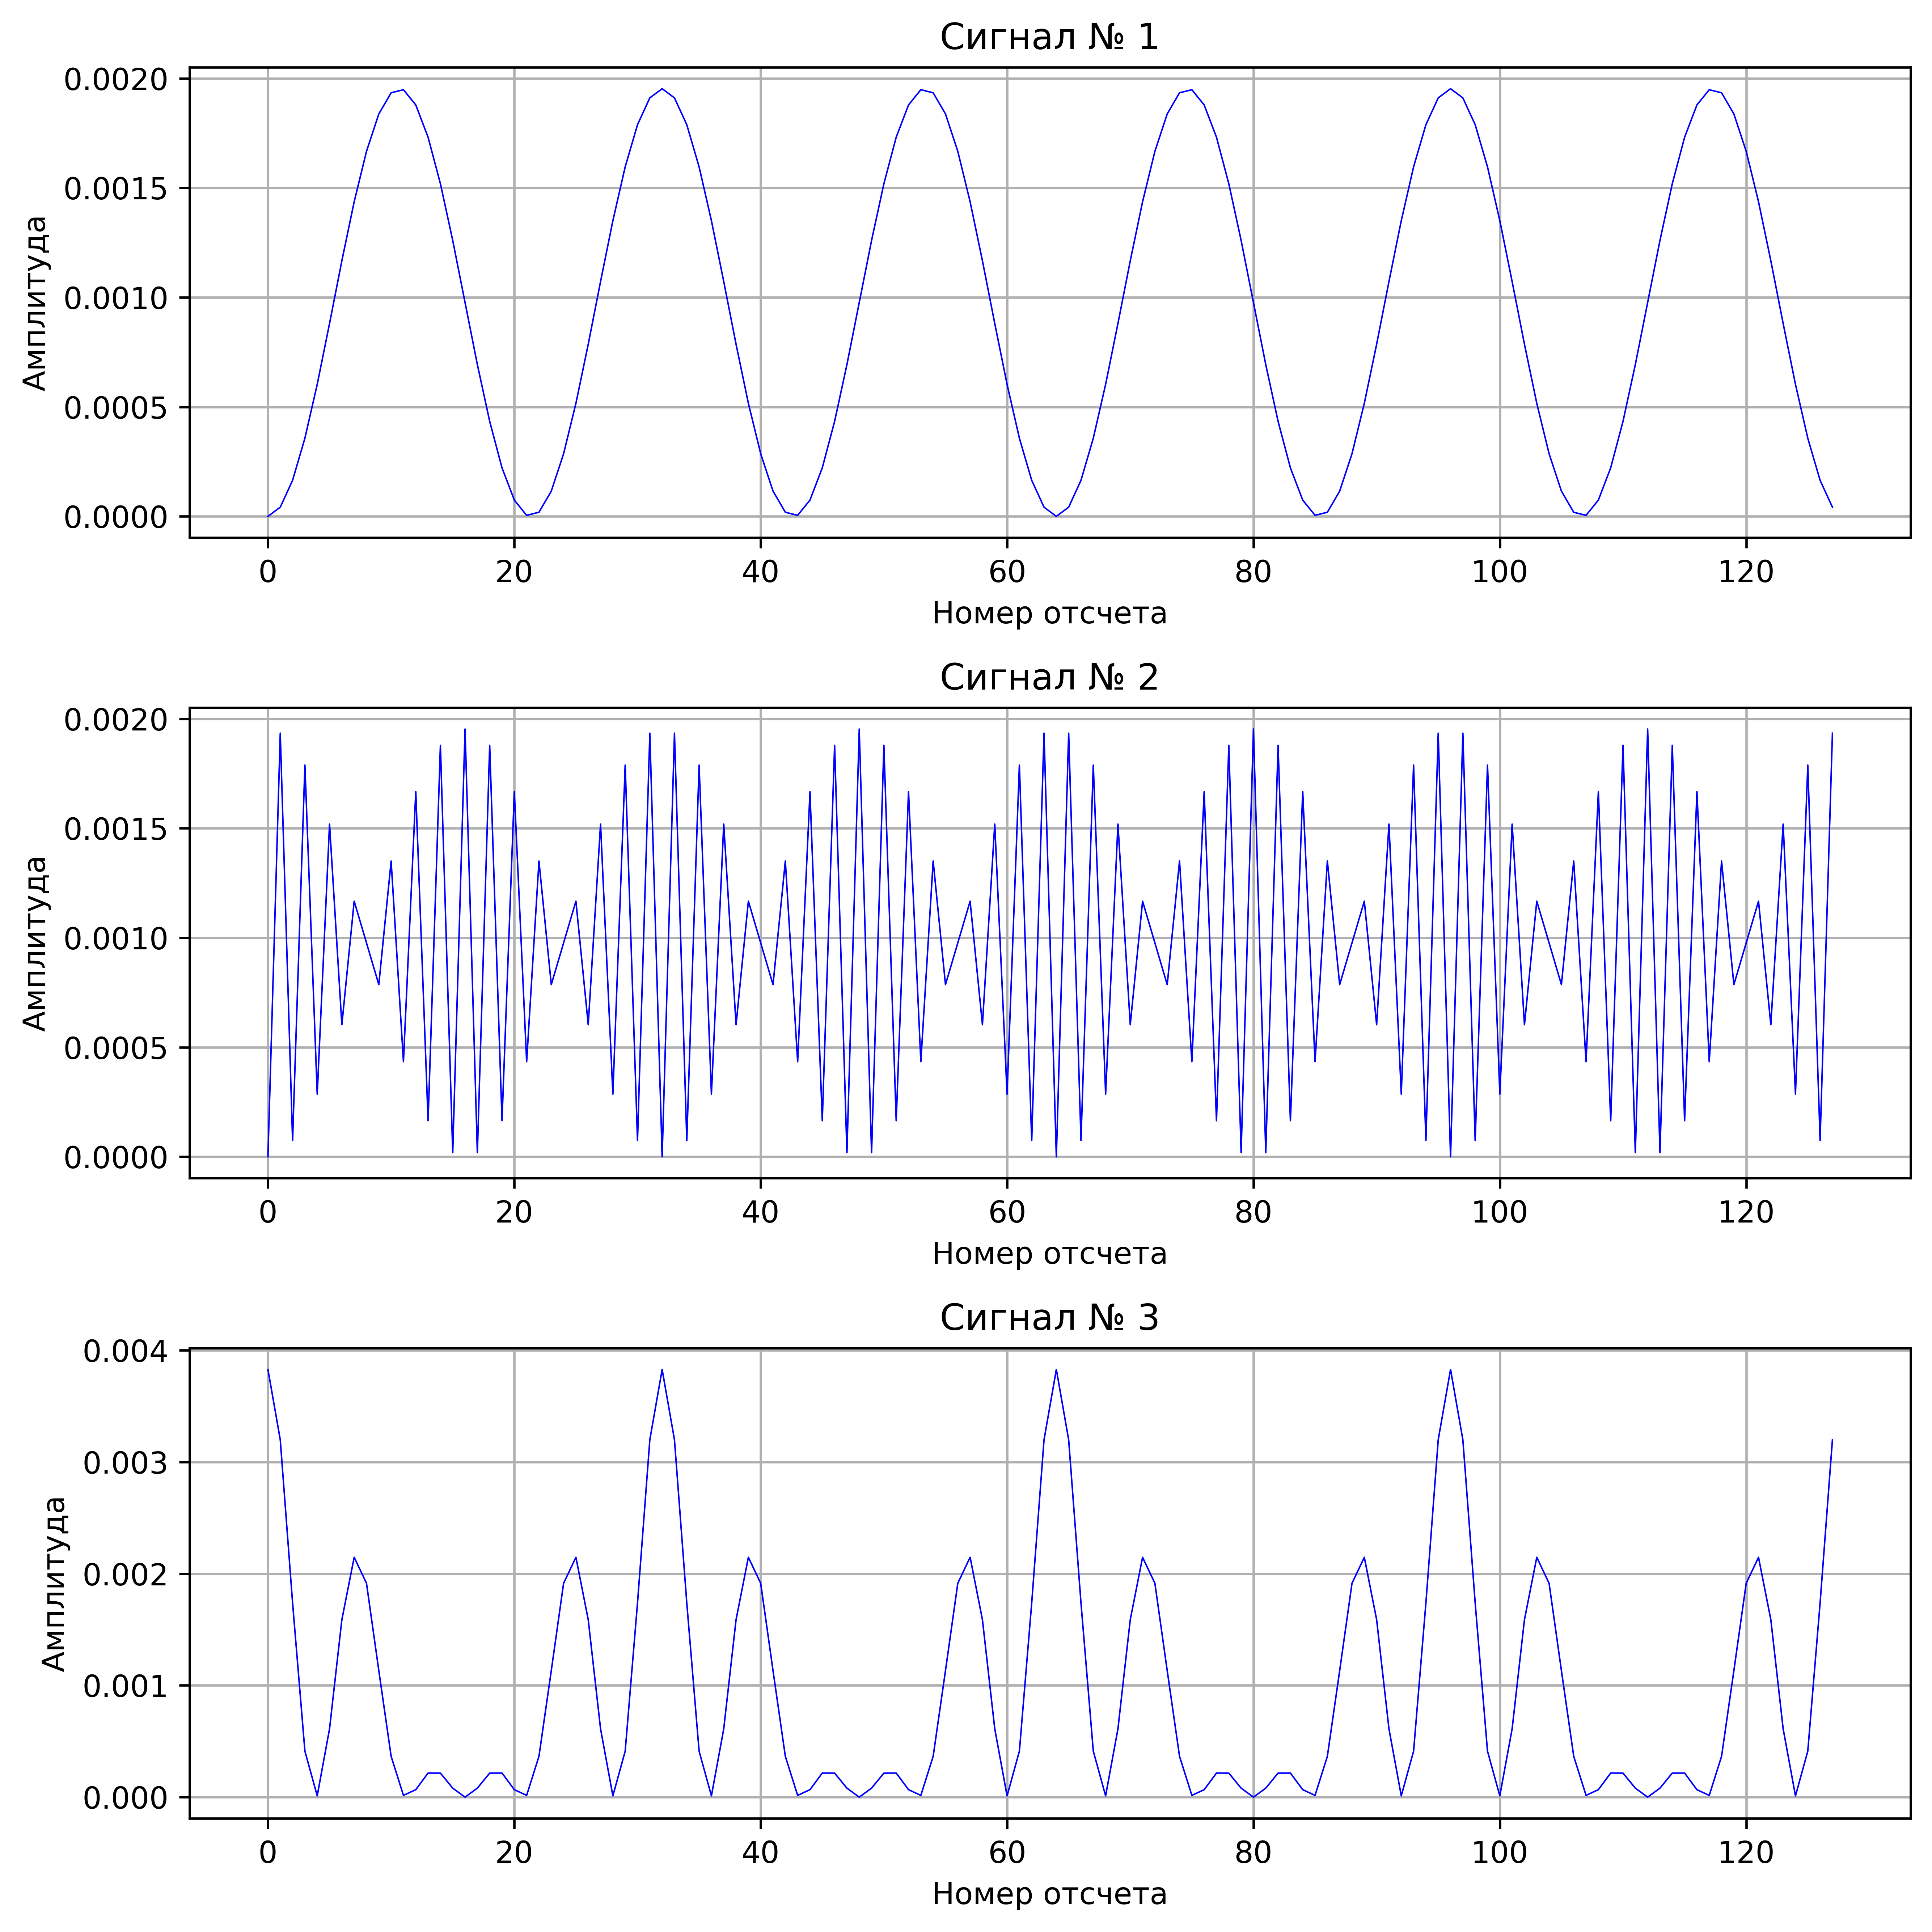

In [57]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

plorPxx(0)
plorPxx(1)
plorPxx(2)

pylab.tight_layout()
pylab.savefig('4_2_2_signal.png', dpi=600)
pylab.show()

# 4.2.3
–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Å–∏–≥–Ω–∞–ª –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π —Å—É–º–º—É –ø–æ–ª–µ–∑–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ –∏ –±–µ–ª–æ–≥–æ —à—É–º–∞ (n = 0, 1, ..., 511):

$$x(n) = 0.4 \cos(2 \pi \frac{9}{128} n) + A \cdot r(n).$$

–û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Å–∏–≥–Ω–∞–ª/—à—É–º (–û–°–®), –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º –ø–æ –ø–µ—Ä–∏–æ–¥–æ–≥—Ä–∞–º–º–µ x(n) –º–æ–∂–Ω–æ –æ–±–Ω–∞—Ä—É–∂–∏—Ç—å –≤ –Ω–µ–º –Ω–∞–ª–∏—á–∏–µ –ø–æ–ª–µ–∑–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞.
–û—Ç–Ω–æ—à–µ–Ω–∏–µ —Å–∏–≥–Ω–∞–ª/—à—É–º (–∞–Ω–≥–ª. signal-to-noise ratio, SNR) ‚Äì –±–µ–∑—Ä–∞–∑–º–µ—Ä–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞, —Ä–∞–≤–Ω–∞—è –æ—Ç–Ω–æ—à–µ–Ω–∏—é –º–æ—â–Ω–æ—Å—Ç–∏ –ø–æ–ª–µ–∑–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ –∫ –º–æ—â–Ω–æ—Å—Ç–∏ —à—É–º–∞:

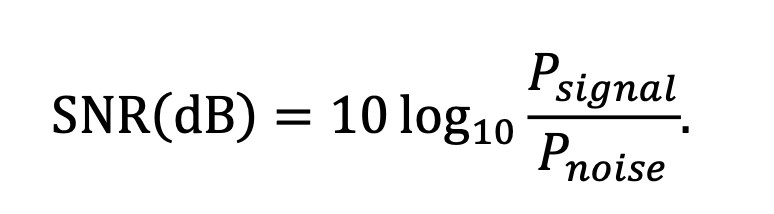

–î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç—Ä–µ–±—É–µ–º–æ–≥–æ –û–°–® –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤, –ø–ª–∞–≤–Ω–æ –∏–∑–º–µ–Ω—è—è –ø–∞—Ä–∞–º–µ—Ç—Ä ùê¥ –∏ –Ω–∞–±–ª—é–¥–∞—è –∏–∑–º–µ–Ω–µ–Ω–∏–µ –ø–µ—Ä–∏–æ–¥–æ–≥—Ä–∞–º–º—ã —Å–∏–≥–Ω–∞–ª–∞. –ë—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ —Å–∏–≥–Ω–∞–ª –º–æ–∂–Ω–æ –æ–±–Ω–∞—Ä—É–∂–∏—Ç—å, –µ—Å–ª–∏ —É—Ä–æ–≤–µ–Ω—å –ø–æ–ª–µ–∑–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ –Ω–∞ 10 –¥–ë –±–æ–ª—å—à–µ —É—Ä–æ–≤–Ω—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç —Å–ø–µ–∫—Ç—Ä–∞, –æ–±—Ä–∞–∑—É–µ–º—ã—Ö —à—É–º–æ–≤—ã–º —Å–∏–≥–Ω–∞–ª–æ–º. –ë–µ–ª—ã–π —à—É–º ùëü(ùëõ)–º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –≤ Matlab–ø—Ä–∏ –ø–æ–º–æ—â–∏ —Ñ—É–Ω–∫—Ü–∏–∏.

In [64]:
def calc_Ps(x):
    Ps = []
    for i in x:
        Ps.append(calc_power(i)[0])
    return Ps

In [74]:
n = np.arange(0, 512, 1)
A = [0.01, 0.05, 0.1, 0.25, 0.3, 0.4, 0.5, 1, 5, 10, 50, 100, 1000]
rng = np.random.default_rng()
r = rng.integers(low=-1, high=1, size=512)
x = 0.4 * np.cos(2 * np.pi * 9 / 128 * n)
Psignal = calc_power(x)[0]
Ar = []
for a in A:
    Ar.append(a * r)
Pnoise = calc_Ps(Ar)
SNR = 10 * np.log10(Psignal / Pnoise)
print(SNR)

[ 32.10959407  18.13019399  12.10959407   4.1507939    2.56716898
   0.06839425  -1.86980601  -7.89040593 -21.86980601 -27.89040593
 -41.86980601 -47.89040593 -67.89040593]


# 4.2.4
–û—Ü–µ–Ω–∏—Ç–µ –°–ü–ú —Å–∏–≥–Ω–∞–ª–∞ –Ω–∞ –≤—ã—Ö–æ–¥–µ —Ñ–∏–ª—å—Ç—Ä–∞ –ø—Ä–∏ –ø–æ–º–æ—â–∏ –º–µ—Ç–æ–¥–∞
—É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è –ø–µ—Ä–∏–æ–¥–æ–≥—Ä–∞–º–º. –ü–∞—Ä–∞–º–µ—Ç—Ä—ã ùëÅùëÜùê¥ùëÄùëÉ –∏ ùëÅùëÜùêªùêºùêπùëá –ø–æ–¥–±–µ—Ä–∏—Ç–µ —Å–∞–º–æ—Å—Ç–æ—è-
—Ç–µ–ª—å–Ω–æ. –ù–∞ –≤—Ö–æ–¥ —Ñ–∏–ª—å—Ç—Ä–∞ –ø–æ—Å—Ç—É–ø–∞–µ—Ç 4096 –æ—Ç—Å—á–µ—Ç–æ–≤ –±–µ–ª–æ–≥–æ —à—É–º–∞. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã
—Ñ–∏–ª—å—Ç—Ä–∞

b = \[0.00482434 0 -0.0192973 0 0.02894606 0 -0.0192973 0 0.00482434];

a = \[1 -2.06958023 3.99771255 -4.3894077 4.45285533 -2.9060422 1.75168470 - 0.5862147 0.18737949];

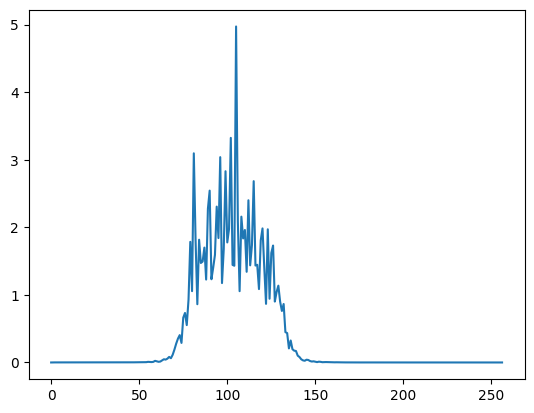

In [85]:
x = np.random.randn(4096)

# –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Ñ–∏–ª—å—Ç—Ä–∞
b = np.array([0.00482434, 0, -0.0192973, 0, 0.02894606, 0, -0.0192973, 0, 0.00482434])
a = np.array([1, -2.06958023, 3.99771255, -4.3894077, 4.45285533, -2.9060422, 1.75168470, -0.5862147, 0.18737949])

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è –ø–µ—Ä–∏–æ–¥–æ–≥—Ä–∞–º–º
N_SAMP = 512
N_SHIF = 256

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –≤—Ö–æ–¥–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ –Ω–∞ –æ–∫–Ω–∞
x_windows = np.reshape(x, (8, N_SAMP))

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ñ–∏–ª—å—Ç—Ä–∞ –∫ –∫–∞–∂–¥–æ–º—É –æ–∫–Ω—É
y_windows = np.zeros_like(x_windows)
for i, x_win in enumerate(x_windows):
    y_windows[i] = lfilter(b, a, x_win)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –ø–µ—Ä–∏–æ–¥–æ–≥—Ä–∞–º–º—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–∫–Ω–∞
periodograms = np.zeros((y_windows.shape[0], N_SAMP // 2 + 1))
for i, y_win in enumerate(y_windows):
    _, periodograms[i] = periodogram(y_win)

# –£—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ –ø–µ—Ä–∏–æ–¥–æ–≥—Ä–∞–º–º
mean_periodogram = np.mean(periodograms, axis=0)

# –û—Ü–µ–Ω–∫–∞ –°–ü–ú —Å–∏–≥–Ω–∞–ª–∞
spm_estimate = np.sqrt(mean_periodogram)

pylab.plot(mean_periodogram)

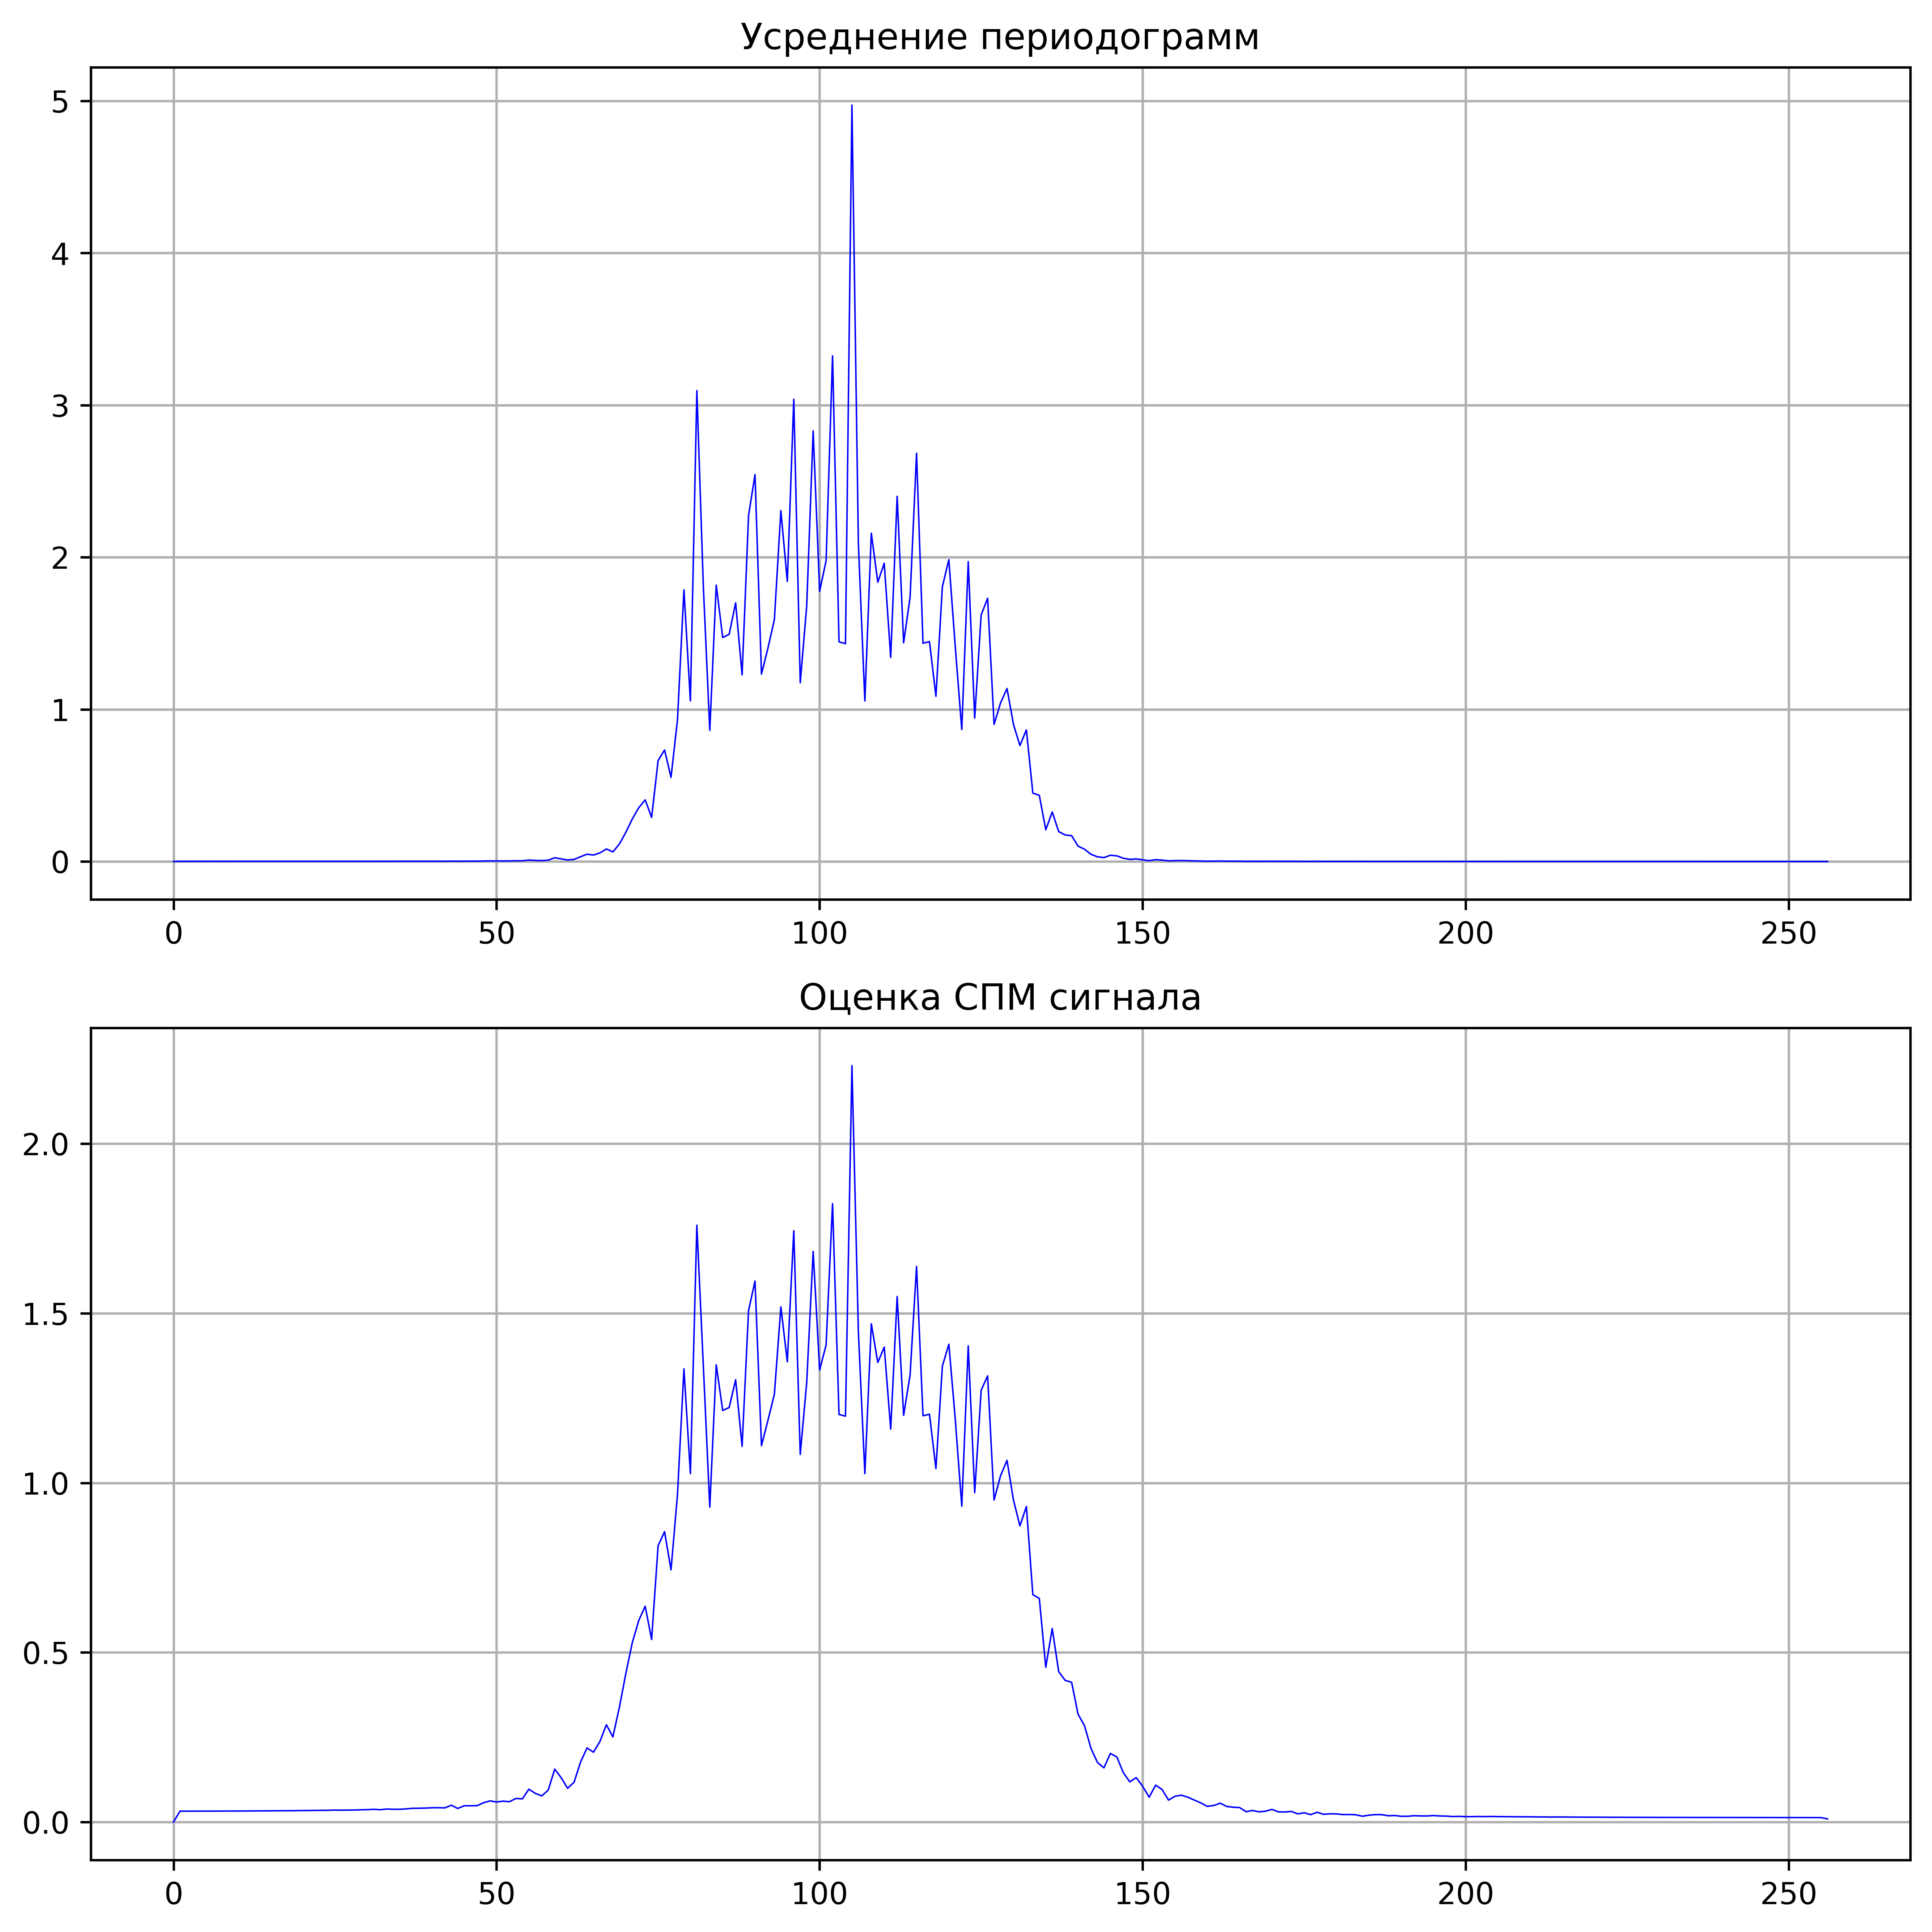

In [88]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

pylab.subplot(2, 1, 1)
pylab.plot(mean_periodogram, linestyle='-', color='b', linewidth=0.5)
pylab.grid()
pylab.title('–£—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ –ø–µ—Ä–∏–æ–¥–æ–≥—Ä–∞–º–º')

pylab.subplot(2, 1, 2)
pylab.plot(spm_estimate, linestyle='-', color='b', linewidth=0.5)
pylab.grid()
pylab.title('–û—Ü–µ–Ω–∫–∞ –°–ü–ú —Å–∏–≥–Ω–∞–ª–∞')

pylab.tight_layout()
pylab.savefig('4_2_4_spm.png', dpi=600)
pylab.show()

# 4.2.5
–ó–∞–¥–∞–Ω–∏–µ –Ω–µ —Å–º–æ–≥ –≤—ã–ø–æ–ª–Ω–∏—Ç—å, —Ç–∞–∫ –∫–∞–∫ –Ω–µ –Ω–∞—à–µ–ª –∏—Å—Ö–æ–¥–Ω–∏–∫–æ–≤.

# 4.2.6
–†–∞–∑—Ä–∞–±–æ—Ç–∞–π—Ç–µ –≤ Matlab —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –æ—Ç–¥–µ–ª–µ–Ω–∏—è –≤–æ–∫–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö —É—á–∞—Å—Ç–∫–æ–≤ —Ä–µ—á–∏ –æ—Ç –Ω–µ–≤–æ–∫–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö:
\[x_v, x_u] = vu_separate(x, N, threshold)
–°–µ–ø–∞—Ä–∞—Ü–∏—è (—Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ) –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –Ω–∞ –æ—Å–Ω–æ–≤–µ –∞–Ω–∞–ª–∏–∑–∞ –∫—Ä–∞—Ç–∫–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–π
–º–æ—â–Ω–æ—Å—Ç–∏ —Å–∏–≥–Ω–∞–ª–∞(—Å–º.(4.7)). –ù–∞ –≤—Ö–æ–¥ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Å—Ç—É–ø–∞–µ—Ç —Ä–µ—á–µ–≤–æ–π —Å–∏–≥–Ω–∞–ª x, –¥–ª–∏-
–Ω–∞ –æ–∫–Ω–∞ –∞–Ω–∞–ª–∏–∑–∞ –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º —Å—á–∏—Ç–∞–µ—Ç—Å—è –º–æ—â–Ω–æ—Å—Ç—å N –∏ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞
threshold. –ï—Å–ª–∏ –º–æ—â–Ω–æ—Å—Ç—å —Å–∏–≥–Ω–∞–ª–∞ –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ ùëõ –±–æ–ª—å—à–µ –ø–æ—Ä–æ–≥–∞, —Ç–æ —Å—á–∏-
—Ç–∞–µ—Ç—Å—è, —á—Ç–æ –æ—Ç—Å—á–µ—Ç ùë•(ùëõ) —è–≤–ª—è–µ—Ç—Å—è –≤–æ–∫–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–º, –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ ‚Äì –Ω–µ–≤–æ-
–∫–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–º. –°–µ–ø–∞—Ä–∞—Ü–∏—è –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

a) –¥–ª—è –≤—Ö–æ–¥–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ ùë•(ùëõ) —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –∫—Ä–∞—Ç–∫–æ–≤—Ä–µ–º–µ–Ω–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å
ùëÉ(ùëõ) –ø–æ –≤—ã—Ä–∞–∂–µ–Ω–∏—é (4.7);

–±) —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –ø—Ä–∏–∑–Ω–∞–∫ –≤–æ–∫–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏:
ùë£(ùëõ)={1, ùëÉ(ùëõ)>thershold,
0, ùëÉ(ùëõ)‚â§thershold;

–≤) –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è —Å–µ–ø–∞—Ä–∞—Ü–∏—è —Å–∏–≥–Ω–∞–ª–∞:
ùë•ùë£(ùëõ)=ùë•(ùëõ)‚ãÖùë£(ùëõ),
ùë•ùë¢(ùëõ)=ùë•(ùëõ)‚ãÖ(1‚àíùë£(ùëõ)).

–£–¥–æ–±–Ω–æ –º–æ—â–Ω–æ—Å—Ç—å —Å–∏–≥–Ω–∞–ª–∞ –ø–æ—Å—á–∏—Ç–∞—Ç—å –≤ –¥–µ—Ü–∏–±–µ–ª–∞—Ö:
ùëÉùëëùêµ(ùëõ)=10log10ùëÉ(ùëõ)
–∏ –ø–æ—Ä–æ–≥ –¥–ª—è —Å–µ–ø–∞—Ä–∞—Ü–∏–∏ —Ç–∞–∫–∂–µ –ø–æ–¥–±–∏—Ä–∞—Ç—å –≤ –¥–µ—Ü–∏–±–µ–ª–∞—Ö.

In [90]:
def vu_separate(x, N, threshold):
    P = np.abs(x) ** 2
    P_dB = 10 * np.log10(P)
    v = P_dB > threshold    
    x_v = x * v
    x_u = x * (1 - v)
    return x_v, x_u